In [1]:
import pandas as pd
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
positive_texts = [
    "we love you",
    "they love us",
    "you are good",
    "he is good",
    "they love mary"
]

negative_texts =  [
    "we hate you", 
    "they hate us",
    "you are bad",
    "he is bad",
    "we hate mary"
]

test_texts = [
    "they love mary",
    "they are good",
    "why do you hate mary",
    "they are almost always good",
    "we are very bad"
]

In [3]:
training_texts = negative_texts + positive_texts
training_labels = ["negative"] * len(negative_texts) + ["positive"] * len(positive_texts)

In [4]:
print(training_texts)

['we hate you', 'they hate us', 'you are bad', 'he is bad', 'we hate mary', 'we love you', 'they love us', 'you are good', 'he is good', 'they love mary']


In [5]:
vectorizer = CountVectorizer()

In [6]:
vectorizer.fit(training_texts)

CountVectorizer()

In [7]:
print(vectorizer.vocabulary_)

{'we': 10, 'hate': 3, 'you': 11, 'they': 8, 'us': 9, 'are': 0, 'bad': 1, 'he': 4, 'is': 5, 'mary': 7, 'love': 6, 'good': 2}


In [8]:
training_vectors = vectorizer.transform(training_texts)
testing_vectors = vectorizer.transform(test_texts)

In [9]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(training_vectors, training_labels)
predictions_proba = classifier.predict_proba(testing_vectors)
print(predictions_proba)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [10]:
###############################################################################################################
#SEE HERE    -- I would like to add code which renames the columns in the table below to the label they signify
#FOR EXAMPLE -- 0 = negative ; 1 = positive
###############################################################################################################
predictions_proba = pd.DataFrame(predictions_proba)
predictions_proba.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


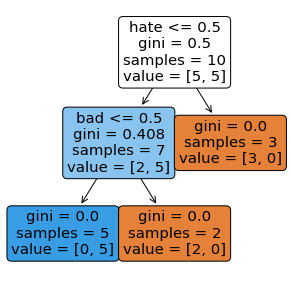

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
tree.plot_tree(classifier,feature_names = vectorizer.get_feature_names(), rounded = True, filled = True) 
fig.savefig('tree.png')